# **EDA**
**Índice**


*   Preprocesado
*   Stop words
*   Lemmatización
*   TF-IDF
*   Keywords
    *   Bigrama
    *   Trigrama
    *   Word Count
    *   WordCloud









hola mundo!

In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import nltk
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from itertools import chain
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/fake_or_real_news.csv')

In [6]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df = df.drop(['id','title'], axis=1)

In [8]:
df

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [9]:
duplicados = df.duplicated()

df_duplicados = df[duplicados]
print(df_duplicados)

                                                   text label
61    On this day in 1973, J. Fred Buzhardt, a lawye...  REAL
90    Killing Obama administration rules, dismantlin...  REAL
157   Killing Obama administration rules, dismantlin...  REAL
233   On this day in 1973, J. Fred Buzhardt, a lawye...  REAL
316   Killing Obama administration rules, dismantlin...  REAL
...                                                 ...   ...
6227  Email \nISIS barbarians used an industrial dou...  FAKE
6233  Email \nNorth Korea’s Foreign Ministry slammed...  FAKE
6250  A verdict in 2017 could have sweeping conseque...  REAL
6270  Killing Obama administration rules, dismantlin...  REAL
6328                                                     FAKE

[275 rows x 2 columns]


In [10]:
total_duplicados = duplicados.sum()
print(f"Número de duplicados: {total_duplicados}")

Número de duplicados: 275


In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(6060, 2)

In [13]:
nulos = df.isnull()

df_nulos  = df[nulos]
print(df_nulos)

     text label
0     NaN   NaN
1     NaN   NaN
2     NaN   NaN
3     NaN   NaN
4     NaN   NaN
...   ...   ...
6330  NaN   NaN
6331  NaN   NaN
6332  NaN   NaN
6333  NaN   NaN
6334  NaN   NaN

[6060 rows x 2 columns]


In [14]:
total_nulos = nulos.sum()
print(f"Valores nulos: \n{df.isnull().sum(axis = 0)}")

Valores nulos: 
text     0
label    0
dtype: int64


In [15]:
# Analizar el balance de la variable LABEL (target)

df.label.value_counts()

,count
label,
FAKE,3071
REAL,2989


# **Preprocesado**

In [16]:
# Transformar la variable LABEL a binaria

target = df['label'].map({'REAL':0, 'FAKE':1})

In [17]:
# Eliminar los caracteres especiales y convertir toodo el texto a minúscula

translator = str.maketrans('', '', string.punctuation+'’‘—“”–')
df["text"] = df['text'].map(lambda x: x.strip().lower().translate(translator))

In [18]:
# Eliminar los numeros

r = re.compile('\d+')
df['text'] = df['text'].apply(lambda x: r.sub(' ', x))

In [19]:
# Eliminar los espacios en blanco duplicados

r = re.compile('\\s+')
df['text'] = df['text'].apply(lambda x: r.sub(' ', x))

# **Stop words**

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
# Descargar los paquetes de LTK

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [24]:
# Tokenizar y eliminar stopwords de la columna TEXT

stopwords = nltk.corpus.stopwords.words('english')
df['text'] = df['text'].map(word_tokenize).apply(lambda x: [word for word in x if word not in stopwords])

# **Lemmatización**

In [25]:
# Aplicar lemmatizador sobre las palabras de la columna TEXT
wordnet_lemmatizer = WordNetLemmatizer()
df['lemma'] = df['text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word, pos=("v")) for word in x])

In [26]:
df[['text', 'lemma']].iloc[30:40]

,text,lemma
30,"[day, j, fred, buzhardt, lawyer, defending, pr...","[day, j, fred, buzhardt, lawyer, defend, presi..."
31,"[randy, maugans, jeffrey, sewell, metabiology,...","[randy, maugans, jeffrey, sewell, metabiology,..."
32,"[previous, article, discussed, stretchingnamel...","[previous, article, discuss, stretchingnamely,..."
33,"[britain, eu, brexit, brexit, prompts, unietd,...","[britain, eu, brexit, brexit, prompt, unietd, ..."
34,"[posted, october, carl, herman, use, trying, e...","[post, october, carl, herman, use, try, escape..."
35,"[trump, raises, concern, members, urban, commu...","[trump, raise, concern, members, urban, commun..."
36,"[first, ever, hindu, elected, us, house, repre...","[first, ever, hindu, elect, us, house, represe..."
37,"[topics, anthony, weiner, presidential, politi...","[topics, anthony, weiner, presidential, politi..."
38,"[exassistant, fbi, director, clintons, crime, ...","[exassistant, fbi, director, clintons, crime, ..."
39,"[first, bill, hillary, clinton, copresidency, ...","[first, bill, hillary, clinton, copresidency, ..."


In [27]:
# Guardar el dataframe con la variable target (label)

df_target = pd.concat([df, target], axis=1)
df_target.to_csv('df_target.csv', index=False)

# **TF-IDF** (Scikit-learn)

Aplicamos TF-IDF a las notícias para extraer las palabras más relevantes de todas ellas además de bigramas y trigramas más relevantes.

In [53]:
# Crear corpus

corpus = df['lemma'].apply(lambda x: ' '.join(x)).to_numpy()

In [29]:
# Convertir palabras a vectores además de propiedades de TF-IDF

vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=1000, max_df=0.9, min_df=0.2)
vectors = vectorizer.fit_transform(corpus)

In [31]:
# Observar las 182 feature_name con sus porcentajes tf-idf en cada noticia

featured_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=featured_names)
df_tfidf

,accord,act,add,allow,already,also,america,american,americans,among,...,white,win,without,work,world,would,write,year,years,yet
0,0.000000,0.156247,0.000000,0.038375,0.074462,0.046323,0.000000,0.000000,0.037528,0.000000,...,0.000000,0.000000,0.073729,0.000000,0.000000,0.022490,0.000000,0.000000,0.056748,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.094458,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.084126,0.057059,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.121882,0.000000,0.000000,0.000000,0.000000,0.000000,0.295629,0.000000,0.115594,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088535,0.000000
3,0.073562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082950,...,0.000000,0.000000,0.000000,0.127009,0.000000,0.000000,0.079644,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.049912,0.000000,0.000000,0.000000,0.000000,...,0.072940,0.551956,0.000000,0.000000,0.000000,0.048465,0.000000,0.000000,0.061146,0.081089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,0.031130,0.000000,0.066822,0.000000,0.000000,0.065839,0.000000,0.000000,0.000000,0.035103,...,0.000000,0.000000,0.000000,0.134371,0.000000,0.021310,0.000000,0.061022,0.080657,0.000000
6056,0.021040,0.000000,0.022582,0.024576,0.000000,0.014833,0.094136,0.202256,0.000000,0.023725,...,0.043353,0.000000,0.000000,0.000000,0.191118,0.014403,0.022780,0.000000,0.090857,0.000000
6057,0.025537,0.030362,0.000000,0.000000,0.000000,0.036007,0.085692,0.147290,0.204193,0.000000,...,0.052619,0.028441,0.057309,0.044091,0.025774,0.069925,0.000000,0.000000,0.000000,0.000000
6058,0.080352,0.000000,0.086239,0.000000,0.000000,0.084970,0.000000,0.038620,0.000000,0.045303,...,0.124172,0.000000,0.000000,0.069366,0.040548,0.055004,0.000000,0.118131,0.138792,0.000000


# **KeyWords**

In [32]:
# Top 5 palabras más relevantes de todas las noticias

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_array = np.argsort(vectors.toarray()).flatten()[::-1] #flatten, matrix to one dimension array

n = 5
top_n = feature_array[tfidf_array][:n]
top_n

array(['trump', 'attack', 'say', 'former', 'try'], dtype=object)

**Bigram**

In [34]:
# Buscar bigramas más relevantes

vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=10000, max_df=0.9, min_df=0.05)
vectors = vectorizer.fit_transform(corpus)

In [35]:
featured_names = vectorizer.get_feature_names_out()
featured_names

array(['american people', 'associate press', 'barack obama',
       'bernie sanders', 'bill clinton', 'clinton campaign',
       'clinton say', 'democratic party', 'donald trump', 'dont know',
       'dont think', 'even though', 'first time', 'foreign policy',
       'fox news', 'general election', 'george bush', 'hillary clinton',
       'hillary clintons', 'islamic state', 'jeb bush', 'last week',
       'last year', 'law enforcement', 'look like', 'make sure',
       'marco rubio', 'middle east', 'national security', 'new hampshire',
       'new york', 'obama administration', 'president barack',
       'president obama', 'presidential campaign',
       'presidential candidate', 'presidential election',
       'presidential nominee', 'republican party',
       'republican presidential', 'say trump', 'say would',
       'secretary state', 'social media', 'state department',
       'supreme court', 'take place', 'ted cruz', 'trump campaign',
       'trump say', 'unite state', 'vice pre

In [40]:
# Top 5 bigramas más importantes

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_array = np.argsort(vectors.toarray()).flatten()[::-1]

n = 5
top_n = feature_array[tfidf_array][:n]
top_n

array(['new hampshire', 'jeb bush', 'say trump', 'donald trump',
       'social media'], dtype=object)

**Trigram**

In [41]:
# Buscar trigramas más relevantes

vectorizer = TfidfVectorizer(ngram_range=(3, 3), max_features=10000, max_df=0.9, min_df=0.025)
vectors = vectorizer.fit_transform(corpus)

In [44]:
featured_names = vectorizer.get_feature_names_out()
featured_names

array(['associate press contribute', 'fbi director jam',
       'former secretary state', 'new york time',
       'president barack obama', 'president unite state',
       'press contribute report', 'private email server',
       'sen bernie sanders', 'sen marco rubio', 'sen ted cruz',
       'wall street journal'], dtype=object)

In [49]:
# Top 5 trigramas

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_array = np.argsort(vectors.toarray()).flatten()[::-1]

n = 5
top_n = feature_array[tfidf_array][:n]
top_n

array(['wall street journal', 'sen ted cruz', 'sen marco rubio',
       'sen bernie sanders', 'private email server'], dtype=object)

# **Word Count**

No tiene en cuenta los vectores y propiedades TF-IDF

<Axes: >

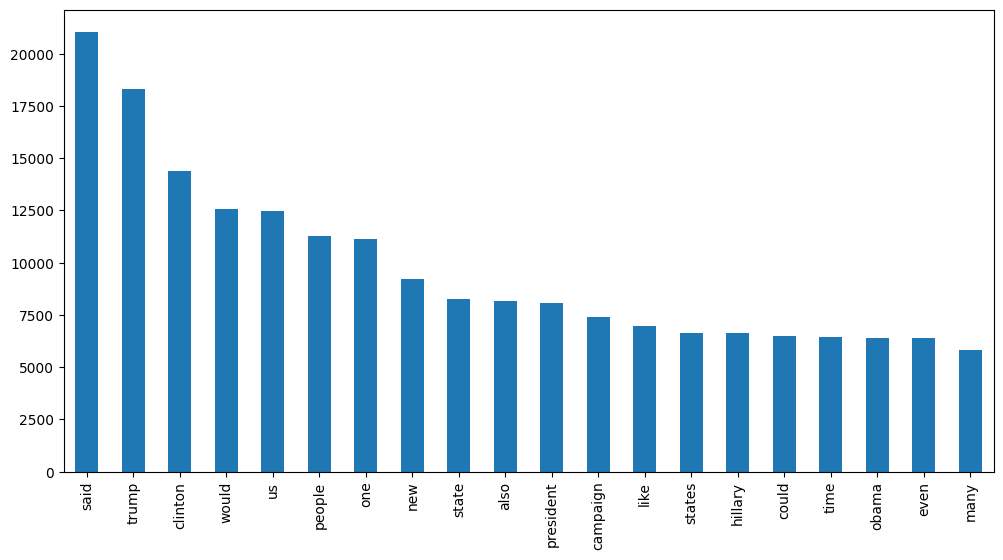

In [50]:
# Generar WordCount con palabras más mencionadas

words = list(chain(*df['text']))
pd.Series(Counter(words)).sort_values(ascending=False).iloc[:20].plot(kind="bar", figsize=(12,6))

# **Word Cloud**

No tiene en cuenta los vectores y propiedades TF-IDF

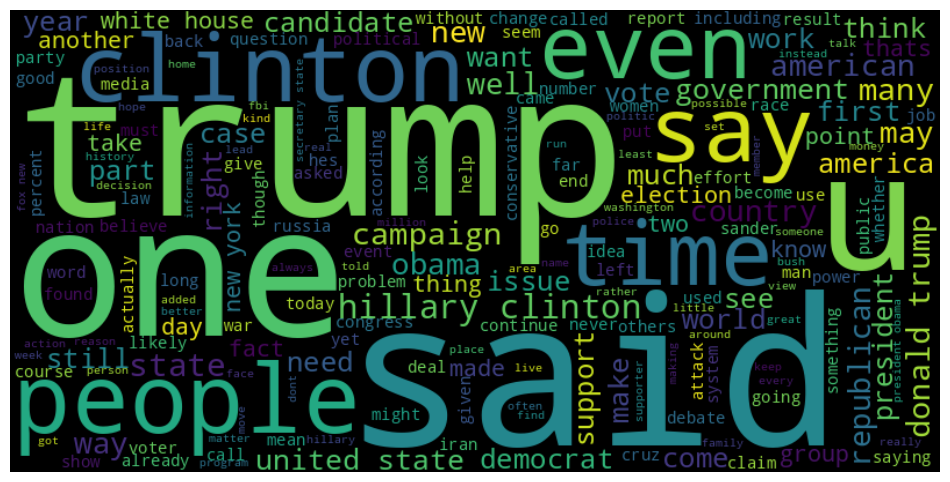

In [52]:
# Generar WorldCloiud con palabras más mencionadas

join_words = ' '.join(words)
wordcloud = WordCloud(width=800, height=400).generate(join_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()